In [59]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [23]:
df_quantity = pd.read_csv('ratnagiri_mango_verified_2012_2024.csv')
df_daily_weather = pd.read_csv('final_daily_weather.csv', parse_dates=["date"])
df_hourly_weather = pd.read_csv('final_hourly_weather.csv', parse_dates=["date"])

In [24]:
df_quantity.head()

,Year,Area_Hectares,Production_MT,Productivity_MT_per_Ha,Weather_Impact_Analysis,Primary_Source,Growth_Rate_Annual
0,2012,67500,117664,1.74,Baseline year - no specific data,NABARD PLP Baseline Assessment,NaN
1,2013,67200,119500,1.78,Normal weather conditions,Agricultural Development Study 2006-2021 (Phar...,NaN
2,2014,66800,121200,1.81,Favorable growing conditions,Agricultural Development Study 2006-2021 (Phar...,1.42
3,2015,66500,124800,1.88,Optimal weather - peak production,Agricultural Development Study 2006-2021 (Phar...,3.00
4,2016,66200,126500,1.91,Good monsoon and temperature,Agricultural Development Study 2006-2021 (Phar...,1.36


the quantity is in metric tonnes

In [25]:
df_daily_weather.head()

,date,temperature_2m_mean,temperature_2m_max,temperature_2m_min,rain_sum,relative_humidity_2m_max,relative_humidity_2m_min,sunshine_duration
0,2012-01-01,26.205751,30.562,23.112,0.0,80,43,36309.457
1,2012-01-02,26.049500,30.462,22.662,0.0,84,52,36034.824
2,2012-01-03,25.316164,31.212,20.662,0.0,95,48,36792.152
3,2012-01-04,25.411997,32.412,20.062,0.0,93,40,36897.800
4,2012-01-05,25.999504,32.512,20.412,0.0,93,36,36805.586


In [26]:
df_hourly_weather.head()

,date,relative_humidity_2m,rain,dew_point_2m,cloud_cover,temperature_2m
0,2012-01-01 00:00:00,72.617530,0.0,19.462000,0,24.712000
1,2012-01-01 01:00:00,74.766470,0.0,19.112000,1,23.862000
2,2012-01-01 02:00:00,75.428185,0.0,19.012001,0,23.612000
3,2012-01-01 03:00:00,79.473530,0.0,19.512001,1,23.262001
4,2012-01-01 04:00:00,79.466620,0.0,19.462000,6,23.212000


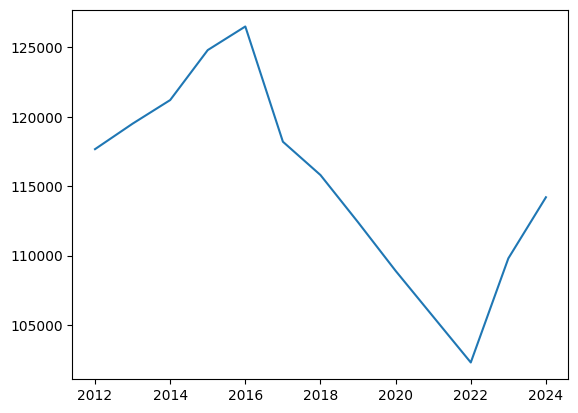

In [27]:
quantity = df_quantity.Production_MT
year = df_quantity.Year

plt.plot(year, quantity)

In [28]:
#variables
mean_temp = df_daily_weather.temperature_2m_mean
rain_sum = df_daily_weather.rain_sum

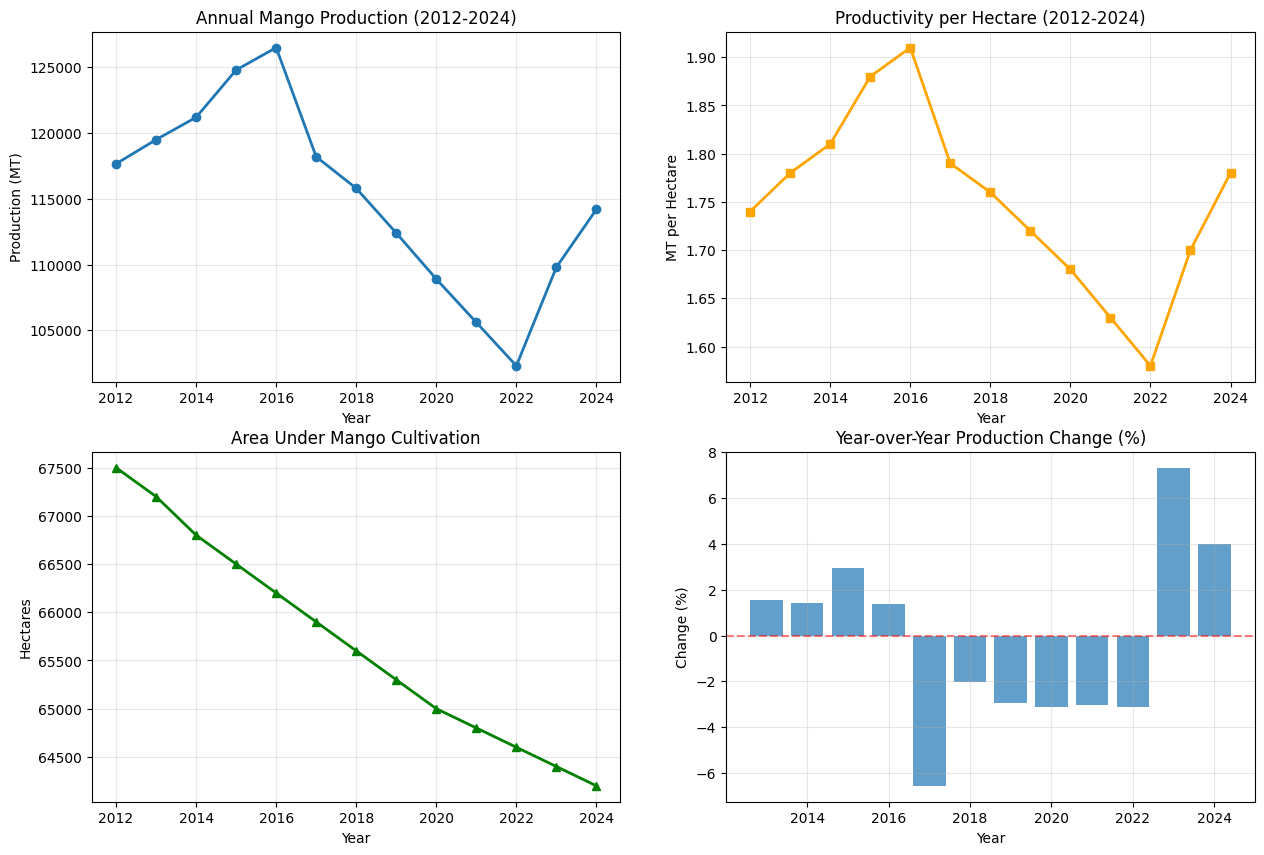

In [29]:
# Production trend analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Annual production trend
axes[0,0].plot(df_quantity['Year'], df_quantity['Production_MT'], marker='o', linewidth=2)
axes[0,0].set_title('Annual Mango Production (2012-2024)')
axes[0,0].set_xlabel('Year')
axes[0,0].set_ylabel('Production (MT)')
axes[0,0].grid(True, alpha=0.3)

# Productivity per hectare trend
axes[0,1].plot(df_quantity['Year'], df_quantity['Productivity_MT_per_Ha'], marker='s', color='orange', linewidth=2)
axes[0,1].set_title('Productivity per Hectare (2012-2024)')
axes[0,1].set_xlabel('Year')
axes[0,1].set_ylabel('MT per Hectare')
axes[0,1].grid(True, alpha=0.3)

# Area under cultivation
axes[1,0].plot(df_quantity['Year'], df_quantity['Area_Hectares'], marker='^', color='green', linewidth=2)
axes[1,0].set_title('Area Under Mango Cultivation')
axes[1,0].set_xlabel('Year')
axes[1,0].set_ylabel('Hectares')
axes[1,0].grid(True, alpha=0.3)

# Year-over-year production change
production_change = df_quantity['Production_MT'].pct_change() * 100
axes[1,1].bar(df_quantity['Year'][1:], production_change[1:], alpha=0.7)
axes[1,1].set_title('Year-over-Year Production Change (%)')
axes[1,1].set_xlabel('Year')
axes[1,1].set_ylabel('Change (%)')
axes[1,1].axhline(y=0, color='red', linestyle='--', alpha=0.5)
axes[1,1].grid(True, alpha=0.3)


/tmp/ipykernel_4256/567118299.py:38: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  heat_wave_days = df_daily_weather.groupby('year').apply(lambda x: (x['temperature_2m_max'] > 40).sum())
/tmp/ipykernel_4256/567118299.py:56: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  heavy_rain_days = df_daily_weather.groupby('year').apply(lambda x: (x['rain_sum'] > 50).sum())


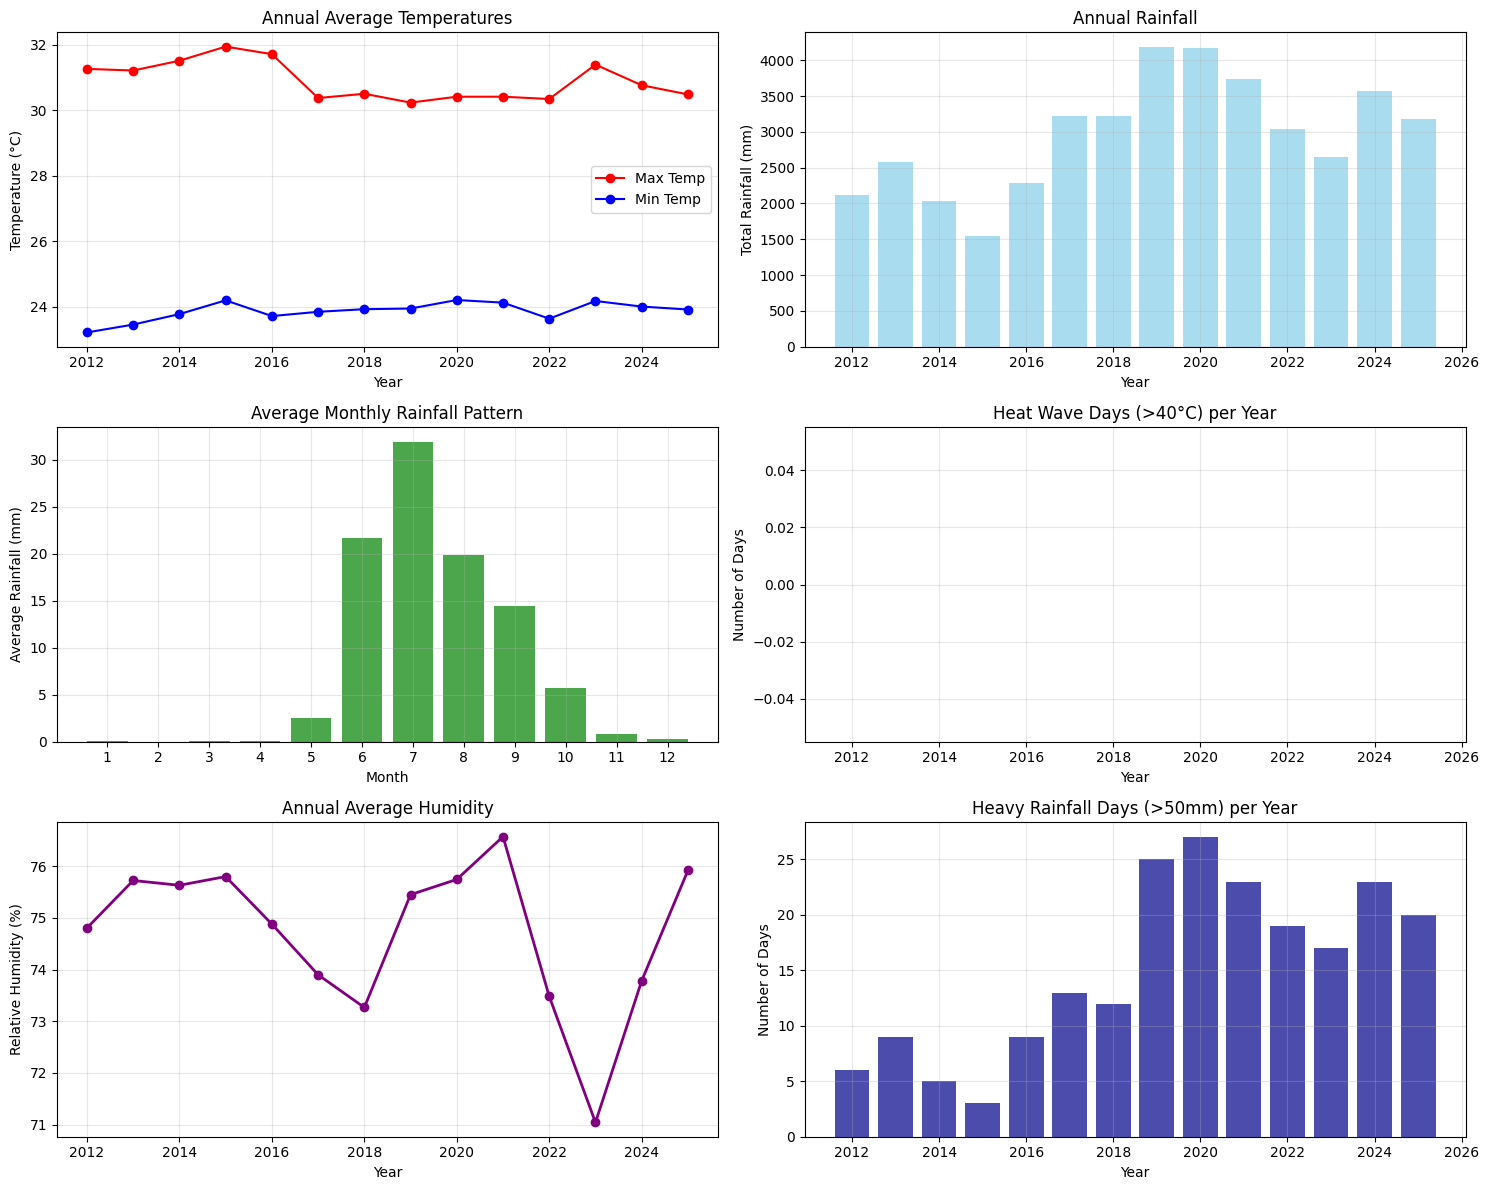

In [30]:
# Weather overview plots
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

# Daily temperature trends
df_daily_weather['year'] = df_daily_weather['date'].dt.year
yearly_temp = df_daily_weather.groupby('year').agg({
    'temperature_2m_max': 'mean',
    'temperature_2m_min': 'mean'
}).round(2)

axes[0,0].plot(yearly_temp.index, yearly_temp['temperature_2m_max'], marker='o', label='Max Temp', color='red')
axes[0,0].plot(yearly_temp.index, yearly_temp['temperature_2m_min'], marker='o', label='Min Temp', color='blue')
axes[0,0].set_title('Annual Average Temperatures')
axes[0,0].set_xlabel('Year')
axes[0,0].set_ylabel('Temperature (°C)')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Annual rainfall
yearly_rainfall = df_daily_weather.groupby('year')['rain_sum'].sum()
axes[0,1].bar(yearly_rainfall.index, yearly_rainfall.values, alpha=0.7, color='skyblue')
axes[0,1].set_title('Annual Rainfall')
axes[0,1].set_xlabel('Year')
axes[0,1].set_ylabel('Total Rainfall (mm)')
axes[0,1].grid(True, alpha=0.3)

# Monthly rainfall pattern (all years combined)
df_daily_weather['month'] = df_daily_weather['date'].dt.month
monthly_rainfall = df_daily_weather.groupby('month')['rain_sum'].mean()
axes[1,0].bar(monthly_rainfall.index, monthly_rainfall.values, alpha=0.7, color='green')
axes[1,0].set_title('Average Monthly Rainfall Pattern')
axes[1,0].set_xlabel('Month')
axes[1,0].set_ylabel('Average Rainfall (mm)')
axes[1,0].set_xticks(range(1,13))
axes[1,0].grid(True, alpha=0.3)

# Extreme weather events
heat_wave_days = df_daily_weather.groupby('year').apply(lambda x: (x['temperature_2m_max'] > 40).sum())
axes[1,1].bar(heat_wave_days.index, heat_wave_days.values, alpha=0.7, color='red')
axes[1,1].set_title('Heat Wave Days (>40°C) per Year')
axes[1,1].set_xlabel('Year')
axes[1,1].set_ylabel('Number of Days')
axes[1,1].grid(True, alpha=0.3)

# Humidity analysis (if available in hourly data)
if 'relative_humidity_2m' in df_hourly_weather.columns:
    df_hourly_weather['year'] = df_hourly_weather['date'].dt.year
    yearly_humidity = df_hourly_weather.groupby('year')['relative_humidity_2m'].mean()
    axes[2,0].plot(yearly_humidity.index, yearly_humidity.values, marker='o', color='purple', linewidth=2)
    axes[2,0].set_title('Annual Average Humidity')
    axes[2,0].set_xlabel('Year')
    axes[2,0].set_ylabel('Relative Humidity (%)')
    axes[2,0].grid(True, alpha=0.3)

# Heavy rainfall days
heavy_rain_days = df_daily_weather.groupby('year').apply(lambda x: (x['rain_sum'] > 50).sum())
axes[2,1].bar(heavy_rain_days.index, heavy_rain_days.values, alpha=0.7, color='darkblue')
axes[2,1].set_title('Heavy Rainfall Days (>50mm) per Year')
axes[2,1].set_xlabel('Year')
axes[2,1].set_ylabel('Number of Days')
axes[2,1].grid(True, alpha=0.3)

plt.tight_layout()

# Weather-Production Correlation Analysis:

/tmp/ipykernel_4256/2174284495.py:16: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weather_annual['heat_wave_days'] = df_daily_weather.groupby('year').apply(lambda x: (x['temperature_2m_max'] > 40).sum())
/tmp/ipykernel_4256/2174284495.py:17: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weather_annual['heavy_rain_days'] = df_daily_weather.groupby('year').apply(lambda x: (x['rain_sum'] > 50).sum())
/tmp/ipykernel_42

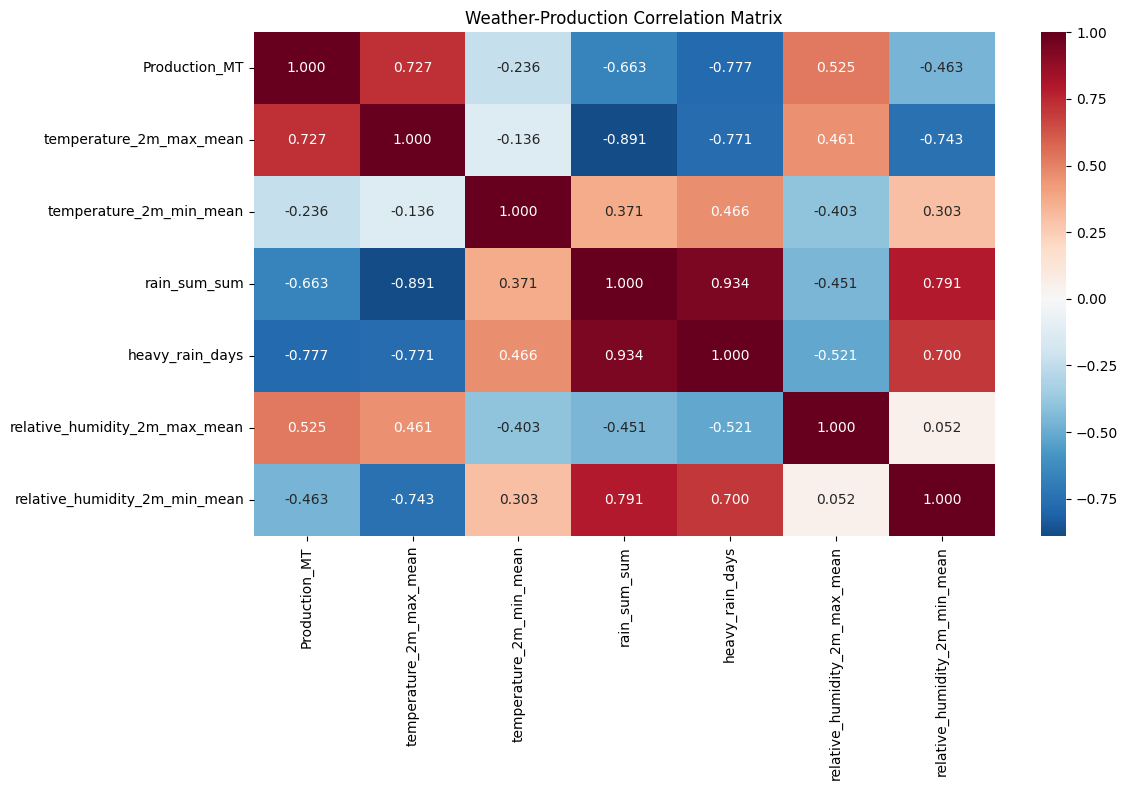

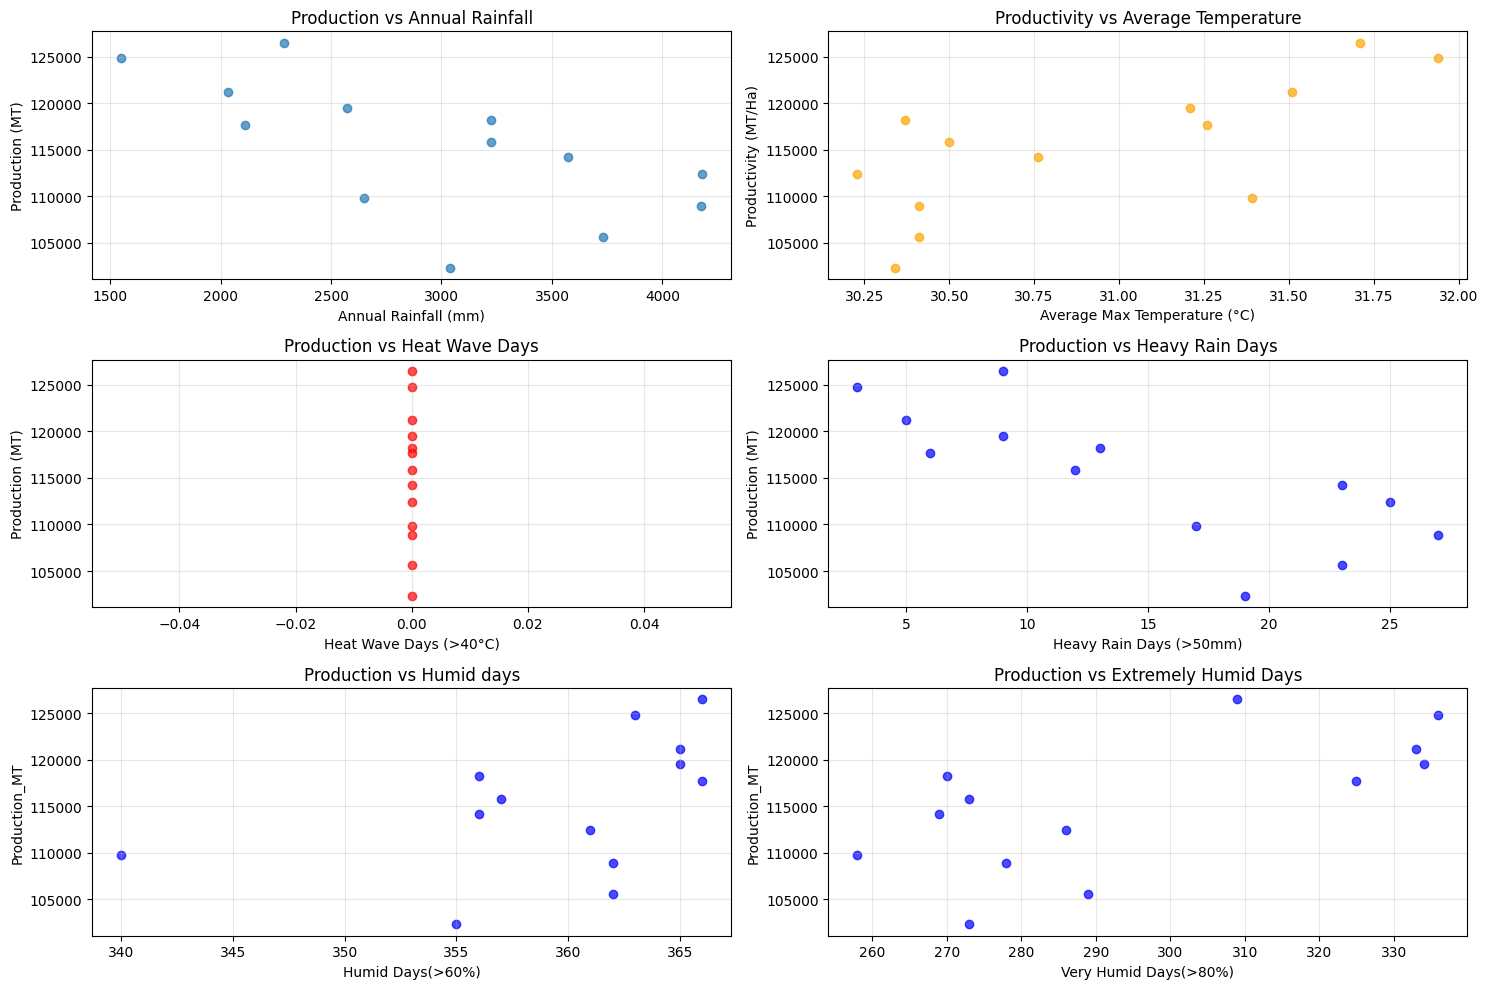

In [67]:
# Create correlation analysis between weather and production
# First, aggregate weather data by year to match production data
weather_annual = df_daily_weather.groupby('year').agg({
    'temperature_2m_max': ['mean', 'max'],
    'temperature_2m_min': ['mean', 'min'],
    'rain_sum': ['sum', 'mean', 'max'],
    'relative_humidity_2m_max': ['mean', 'max'],
    'relative_humidity_2m_min': ['mean', 'min'],
    'sunshine_duration': 'sum' if 'sunshine_duration' in df_daily_weather.columns else 'mean'
}).round(2)

# Flatten column names
weather_annual.columns = ['_'.join(col).strip() for col in weather_annual.columns]

# Add extreme weather indicators
weather_annual['heat_wave_days'] = df_daily_weather.groupby('year').apply(lambda x: (x['temperature_2m_max'] > 40).sum())
weather_annual['heavy_rain_days'] = df_daily_weather.groupby('year').apply(lambda x: (x['rain_sum'] > 50).sum())
weather_annual['humid_days'] = df_daily_weather.groupby('year').apply(lambda x: (x['relative_humidity_2m_max'] > 60).sum())
weather_annual['high_humid_days'] = df_daily_weather.groupby('year').apply(lambda x: (x['relative_humidity_2m_max'] > 80).sum())

# Merge with production data
merged_data = df_quantity.merge(weather_annual, left_on='Year', right_index=True, how='inner')

# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_cols = ['Production_MT', 'temperature_2m_max_mean',
                   'temperature_2m_min_mean', 'rain_sum_sum', 'heavy_rain_days', 'relative_humidity_2m_max_mean', 'relative_humidity_2m_min_mean']
corr_matrix = merged_data[correlation_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0, fmt='.3f')
plt.title('Weather-Production Correlation Matrix')
plt.tight_layout()
plt.show()

# Scatter plots for key correlations
fig, axes = plt.subplots(3, 2, figsize=(15, 10))

# Production vs Annual Rainfall
axes[0,0].scatter(merged_data['rain_sum_sum'], merged_data['Production_MT'], alpha=0.7)
axes[0,0].set_xlabel('Annual Rainfall (mm)')
axes[0,0].set_ylabel('Production (MT)')
axes[0,0].set_title('Production vs Annual Rainfall')
axes[0,0].grid(True, alpha=0.3)

# Productivity vs Average Temperature
axes[0,1].scatter(merged_data['temperature_2m_max_mean'], merged_data['Production_MT'], alpha=0.7, color='orange')
axes[0,1].set_xlabel('Average Max Temperature (°C)')
axes[0,1].set_ylabel('Productivity (MT/Ha)')
axes[0,1].set_title('Productivity vs Average Temperature')
axes[0,1].grid(True, alpha=0.3)

# Production vs Heat Wave Days
axes[1,0].scatter(merged_data['heat_wave_days'], merged_data['Production_MT'], alpha=0.7, color='red')
axes[1,0].set_xlabel('Heat Wave Days (>40°C)')
axes[1,0].set_ylabel('Production (MT)')
axes[1,0].set_title('Production vs Heat Wave Days')
axes[1,0].grid(True, alpha=0.3)

# Production vs Heavy Rain Days
axes[1,1].scatter(merged_data['heavy_rain_days'], merged_data['Production_MT'], alpha=0.7, color='blue')
axes[1,1].set_xlabel('Heavy Rain Days (>50mm)')
axes[1,1].set_ylabel('Production (MT)')
axes[1,1].set_title('Production vs Heavy Rain Days')
axes[1,1].grid(True, alpha=0.3)

# Production vs Humid days
axes[2,0].scatter(merged_data['humid_days'], merged_data['Production_MT'], alpha=0.7, color='blue')
axes[2,0].set_xlabel('Humid Days(>60%)')
axes[2,0].set_ylabel('Production_MT')
axes[2,0].set_title('Production vs Humid days')
axes[2,0].grid(True, alpha=0.3)

#Production vs extremely high humidity
axes[2,1].scatter(merged_data['high_humid_days'], merged_data['Production_MT'], alpha=0.7, color='blue')
axes[2,1].set_xlabel('Very Humid Days(>80%)')
axes[2,1].set_ylabel('Production_MT')
axes[2,1].set_title('Production vs Extremely Humid Days')
axes[2,1].grid(True, alpha=0.3)

plt.tight_layout()

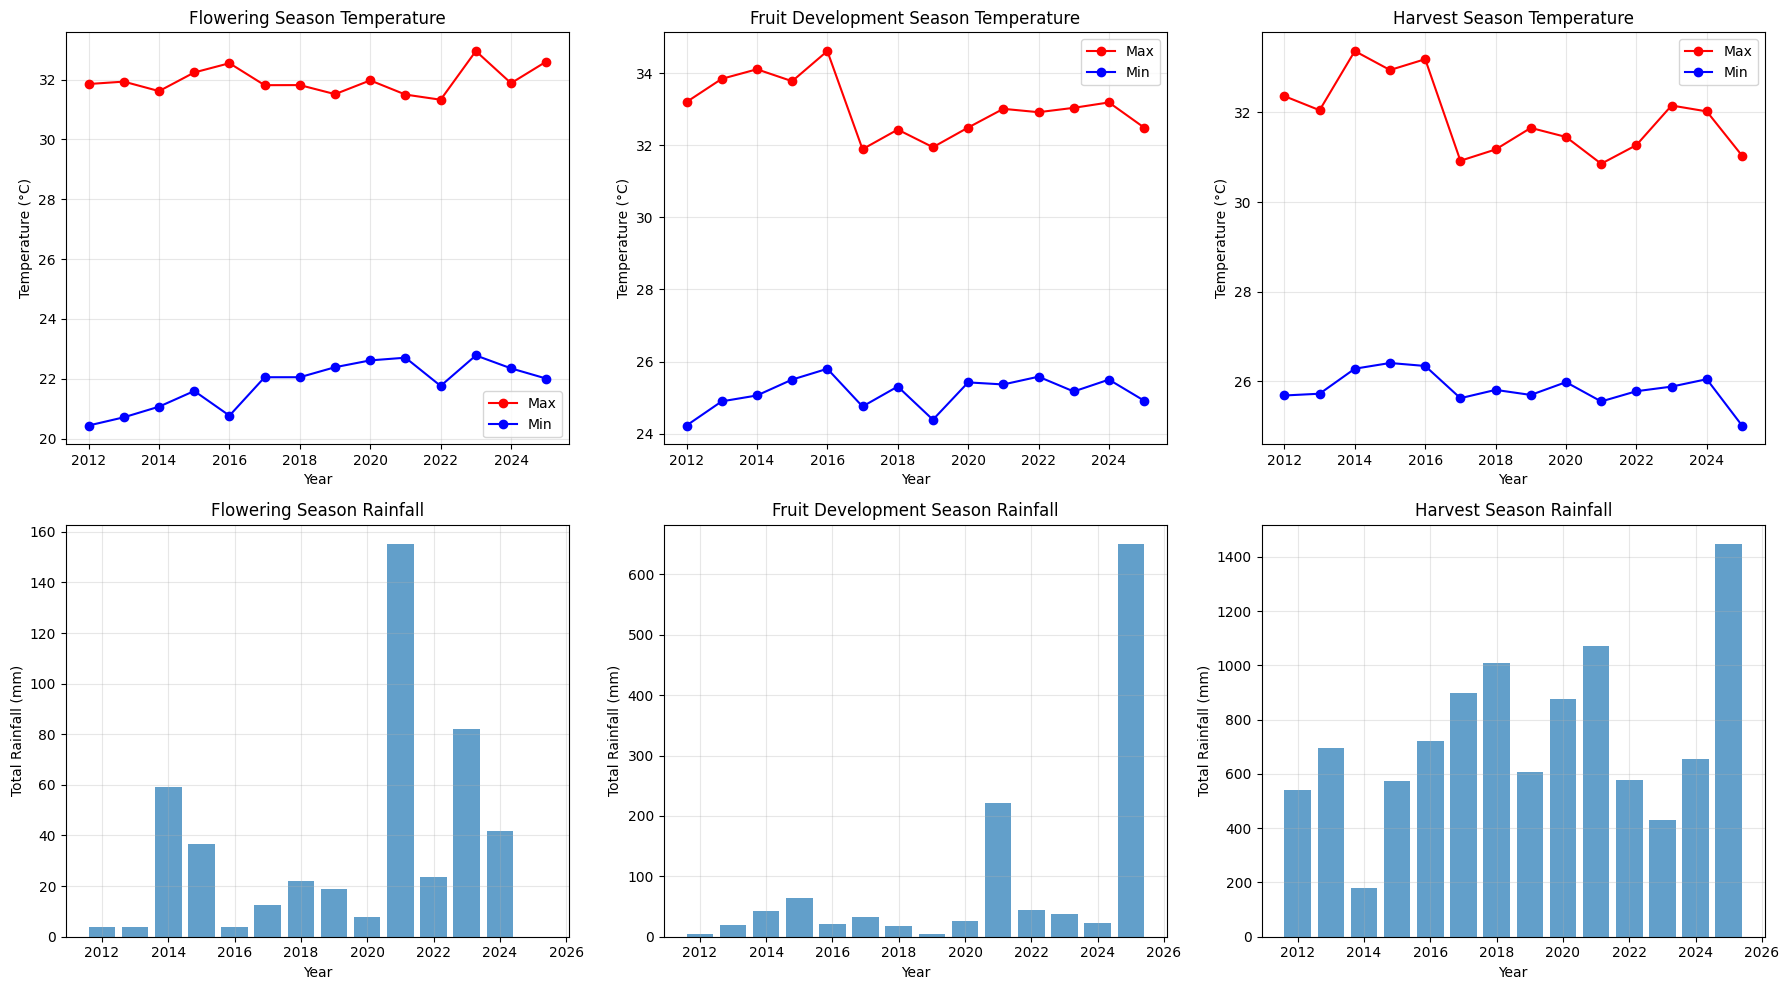

In [57]:
# Seasonal weather patterns during critical mango periods
df_daily_weather['month'] = df_daily_weather['date'].dt.month

# Define mango growth seasons
flowering_months = [11, 12, 1, 2]  # Nov-Feb
fruit_development_months = [3, 4, 5]  # Mar-May
harvest_months = [4, 5, 6]  # Apr-Jun

# Create seasonal analysis
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

seasons = {
    'Flowering': flowering_months,
    'Fruit Development': fruit_development_months,
    'Harvest': harvest_months
}

for i, (season, months) in enumerate(seasons.items()):
    seasonal_data = df_daily_weather[df_daily_weather['month'].isin(months)]
    
    # Temperature during season
    seasonal_temp = seasonal_data.groupby('year').agg({
        'temperature_2m_max': 'mean',
        'temperature_2m_min': 'mean'
    })
    
    axes[0, i].plot(seasonal_temp.index, seasonal_temp['temperature_2m_max'], marker='o', label='Max', color='red')
    axes[0, i].plot(seasonal_temp.index, seasonal_temp['temperature_2m_min'], marker='o', label='Min', color='blue')
    axes[0, i].set_title(f'{season} Season Temperature')
    axes[0, i].set_xlabel('Year')
    axes[0, i].set_ylabel('Temperature (°C)')
    axes[0, i].legend()
    axes[0, i].grid(True, alpha=0.3)
    
    # Rainfall during season
    seasonal_rainfall = seasonal_data.groupby('year')['rain_sum'].sum()
    axes[1, i].bar(seasonal_rainfall.index, seasonal_rainfall.values, alpha=0.7)
    axes[1, i].set_title(f'{season} Season Rainfall')
    axes[1, i].set_xlabel('Year')
    axes[1, i].set_ylabel('Total Rainfall (mm)')
    axes[1, i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

plt.show()

<Figure size 1500x1000 with 0 Axes>

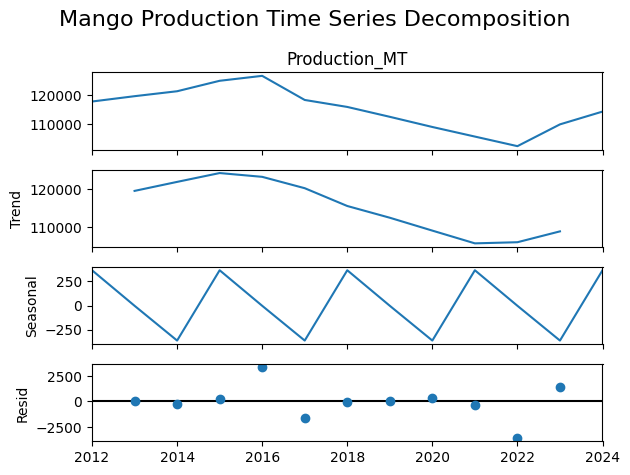

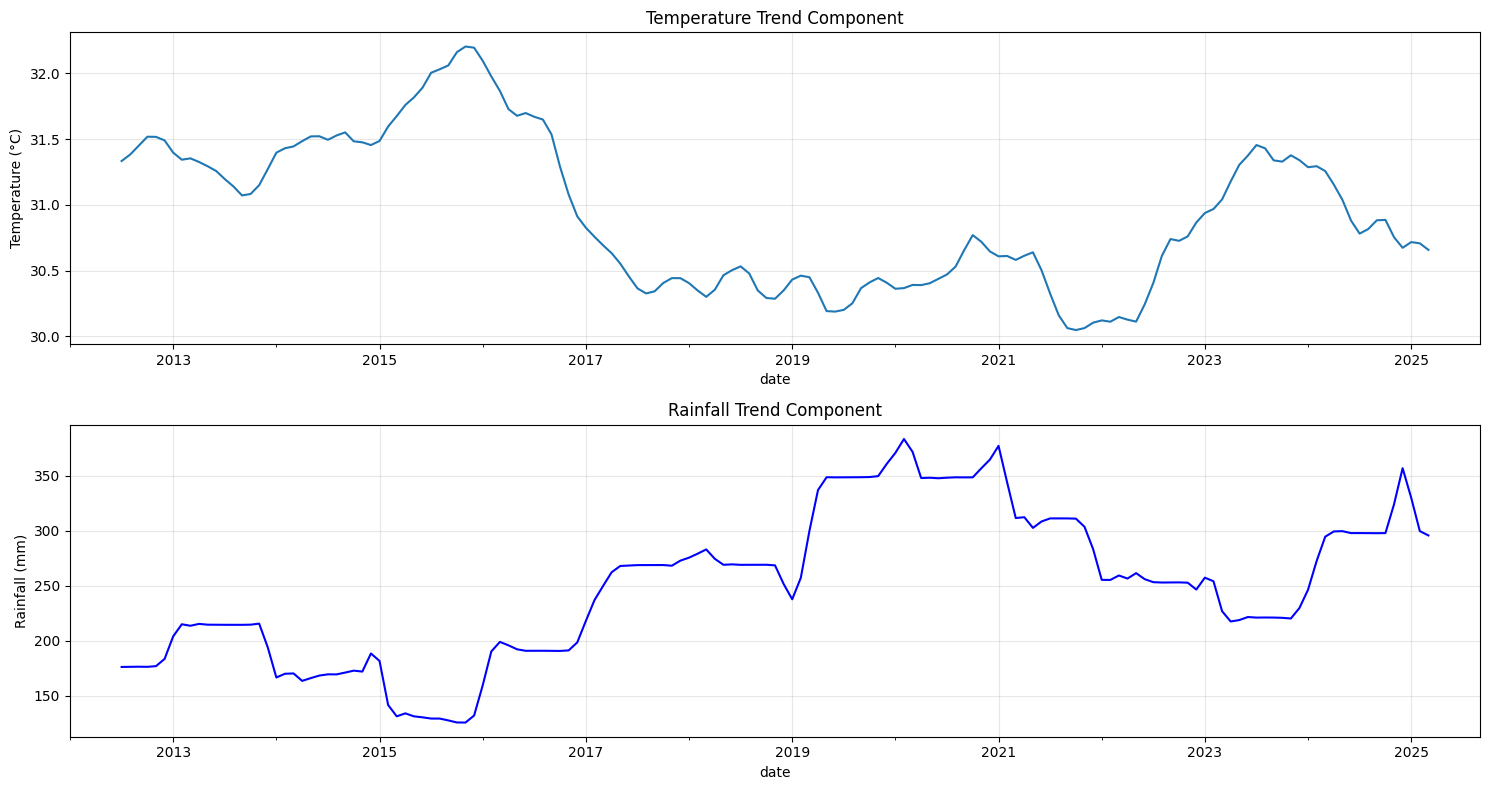

In [64]:
# Production time series decomposition
plt.figure(figsize=(15, 10))
decomposition = seasonal_decompose(df_quantity.set_index('Year')['Production_MT'], model='additive', period=3)
decomposition.plot()
plt.suptitle('Mango Production Time Series Decomposition', fontsize=16)
plt.tight_layout()
plt.show()

# Weather time series (monthly aggregation for better decomposition)
monthly_weather = df_daily_weather.set_index('date').resample('ME').agg({
    'temperature_2m_max': 'mean',
    'rain_sum': 'sum'
})

fig, axes = plt.subplots(2, 1, figsize=(15, 8))

# Temperature decomposition
temp_decomp = seasonal_decompose(monthly_weather['temperature_2m_max'].dropna(), model='additive', period=12)
temp_decomp.trend.plot(ax=axes[0], title='Temperature Trend Component')
axes[0].set_ylabel('Temperature (°C)')
axes[0].grid(True, alpha=0.3)

# Rainfall decomposition
rain_decomp = seasonal_decompose(monthly_weather['rain_sum'].dropna(), model='additive', period=12)
rain_decomp.trend.plot(ax=axes[1], title='Rainfall Trend Component', color='blue')
axes[1].set_ylabel('Rainfall (mm)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

/tmp/ipykernel_4256/4236241243.py:46: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1,1].boxplot([flowering_temps, development_temps, harvest_temps],


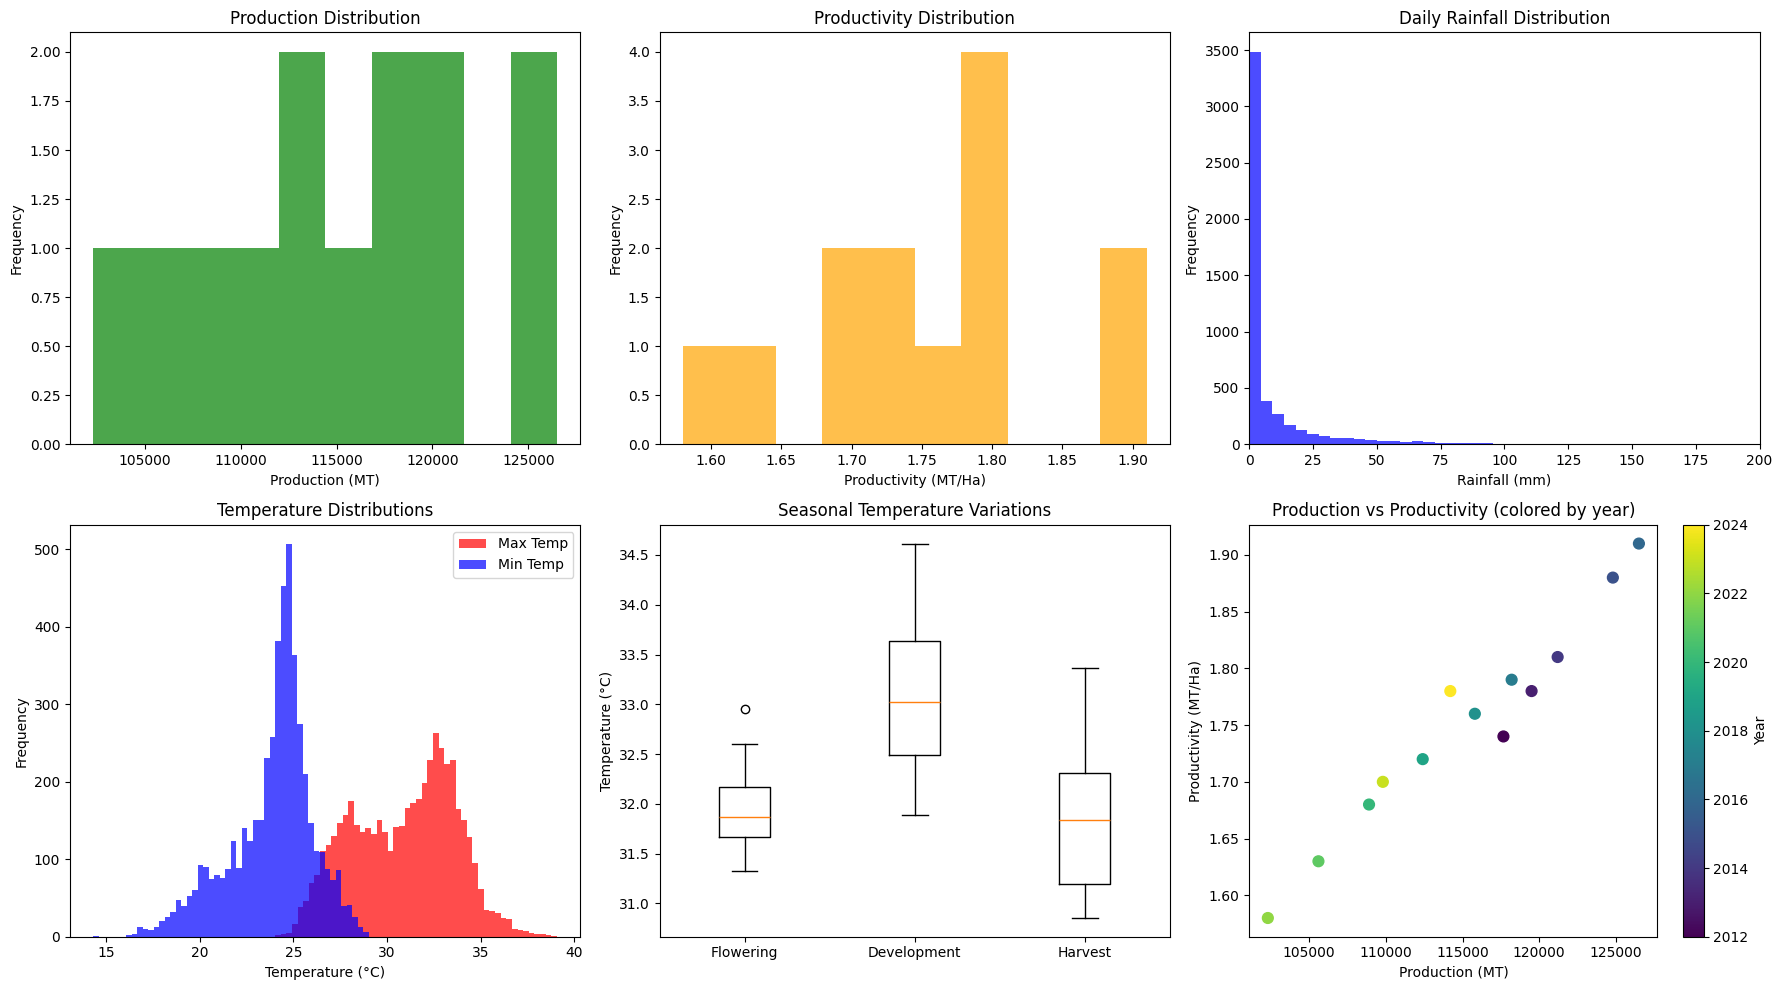

In [66]:
# Distribution of key variables
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Production distribution
axes[0,0].hist(df_quantity['Production_MT'], bins=10, alpha=0.7, color='green')
axes[0,0].set_title('Production Distribution')
axes[0,0].set_xlabel('Production (MT)')
axes[0,0].set_ylabel('Frequency')

# Productivity distribution
axes[0,1].hist(df_quantity['Productivity_MT_per_Ha'], bins=10, alpha=0.7, color='orange')
axes[0,1].set_title('Productivity Distribution')
axes[0,1].set_xlabel('Productivity (MT/Ha)')
axes[0,1].set_ylabel('Frequency')

# Daily rainfall distribution
axes[0,2].hist(df_daily_weather['rain_sum'], bins=50, alpha=0.7, color='blue')
axes[0,2].set_title('Daily Rainfall Distribution')
axes[0,2].set_xlabel('Rainfall (mm)')
axes[0,2].set_ylabel('Frequency')
axes[0,2].set_xlim(0, 200)  # Focus on main distribution

# Temperature distributions
axes[1,0].hist(df_daily_weather['temperature_2m_max'], bins=50, alpha=0.7, color='red', label='Max Temp')
axes[1,0].hist(df_daily_weather['temperature_2m_min'], bins=50, alpha=0.7, color='blue', label='Min Temp')
axes[1,0].set_title('Temperature Distributions')
axes[1,0].set_xlabel('Temperature (°C)')
axes[1,0].set_ylabel('Frequency')
axes[1,0].legend()

# Box plots for seasonal temperature
seasonal_temps = []
season_labels = []
for year in df_daily_weather['year'].unique():
    year_data = df_daily_weather[df_daily_weather['year'] == year]
    for season, months in seasons.items():
        seasonal_temp = year_data[year_data['month'].isin(months)]['temperature_2m_max'].mean()
        seasonal_temps.append(seasonal_temp)
        season_labels.append(f"{season}\n{year}")

# Group by season for box plot
flowering_temps = [seasonal_temps[i] for i in range(0, len(seasonal_temps), 3)]
development_temps = [seasonal_temps[i] for i in range(1, len(seasonal_temps), 3)]
harvest_temps = [seasonal_temps[i] for i in range(2, len(seasonal_temps), 3)]

axes[1,1].boxplot([flowering_temps, development_temps, harvest_temps], 
                  labels=['Flowering', 'Development', 'Harvest'])
axes[1,1].set_title('Seasonal Temperature Variations')
axes[1,1].set_ylabel('Temperature (°C)')

# Annual production vs productivity scatter
axes[1,2].scatter(df_quantity['Production_MT'], df_quantity['Productivity_MT_per_Ha'], 
                  c=df_quantity['Year'], cmap='viridis', s=60)
axes[1,2].set_xlabel('Production (MT)')
axes[1,2].set_ylabel('Productivity (MT/Ha)')
axes[1,2].set_title('Production vs Productivity (colored by year)')
plt.colorbar(axes[1,2].collections[0], ax=axes[1,2], label='Year')

plt.tight_layout()
plt.show()

- [x] Understood data

Next:
- create splits according to months
- understand data according to month-wise 

In [83]:
def create_weather_features(daily_df, hourly_df=None):
    """
    Generate weather features for mango production modeling.
    daily_df must have:
      - date (datetime64)
      - any of temperature_2m_max, temperature_2m_min, temperature_2m_mean
      - any of precipitation_sum, rain_sum, rainfall
    hourly_df (optional) must have:
      - date (datetime64)
      - relative_humidity_2m or humidity
    """

    # Ensure date columns are datetime
    daily = daily_df.copy()
    daily['date'] = pd.to_datetime(daily['date'])
    daily['year'] = daily['date'].dt.year
    daily['month'] = daily['date'].dt.month

    if hourly_df is not None:
        hourly = hourly_df.copy()
        hourly['date'] = pd.to_datetime(hourly['date'])
        hourly['year'] = hourly['date'].dt.year
        hourly['month'] = hourly['date'].dt.month
    else:
        hourly = None

    # Define critical periods
    periods = {
        'flowering': [11,12,1,2],
        'fruit_dev': [3,4,5],
        'harvest':   [4,5,6]
    }

    def stat(df, col_options, year, months, func, **kwargs):
        """Select column from col_options present in df, filter by year/months, and apply func."""
        cols = [c for c in col_options if c in df.columns]
        if not cols:
            return np.nan
        col = cols[0]
        # handle flowering crossing year boundary
        if set(months) & {11,12}:
            prev = df[(df['year']==year-1)&(df['month'].isin([m for m in months if m>10]))]
            curr = df[(df['year']==year)&(df['month'].isin([m for m in months if m<11]))]
            data = pd.concat([prev,curr])
        else:
            data = df[(df['year']==year)&(df['month'].isin(months))]
        if data.empty:
            return np.nan
        series = data[col].dropna()
        if series.empty:
            return np.nan
        if func=='mean':
            return series.mean()
        if func=='max':
            return series.max()
        if func=='min':
            return series.min()
        if func=='sum':
            return series.sum()
        if func=='std':
            return series.std()
        if func=='count_above':
            return (series>kwargs['threshold']).sum()
        if func=='count_below':
            return (series<kwargs['threshold']).sum()
        return np.nan

    def max_dry(df, year, months):
        """Max consecutive dry days where rainfall ≤ 1 mm."""
        cols = [c for c in ['rain_sum','rainfall'] if c in df.columns]
        if not cols: return np.nan
        col = cols[0]
        if set(months)&{11,12}:
            prev = df[(df['year']==year-1)&(df['month'].isin([m for m in months if m>10]))]
            curr = df[(df['year']==year)&(df['month'].isin([m for m in months if m<11]))]
            data = pd.concat([prev,curr])
        else:
            data = df[(df['year']==year)&(df['month'].isin(months))]
        if data.empty:
            return np.nan
        dry = (data[col] <= 1).astype(int).values
        maxc = cur = 0
        for d in dry:
            if d: cur+=1; maxc=max(maxc,cur)
            else: cur=0
        return maxc

    features = {}
    for year in range(2012, 2025):
        feats = {}
        for name, months in periods.items():
            # Temperature stats
            feats[f'{name}_avg_temp']  = stat(daily, ['temperature_2m_mean','temperature_2m_max','temperature_2m_min'], year, months, 'mean')
            feats[f'{name}_min_temp']  = stat(daily, ['temperature_2m_min','temperature_2m_mean'], year, months, 'min')
            feats[f'{name}_max_temp']  = stat(daily, ['temperature_2m_max','temperature_2m_mean'], year, months, 'max')
            feats[f'{name}_std_temp']  = stat(daily, ['temperature_2m_mean'], year, months, 'std')
            feats[f'{name}_heat_days']= stat(daily, ['temperature_2m_max'], year, months, 'count_above', threshold=35)
            feats[f'{name}_cold_days']= stat(daily, ['temperature_2m_min'], year, months, 'count_below', threshold=20)
            # Rainfall stats
            feats[f'{name}_total_rain']= stat(daily, ['rain_sum','rainfall'], year, months, 'sum')
            feats[f'{name}_avg_rain']  = stat(daily, ['rain_sum','rainfall'], year, months, 'mean')
            feats[f'{name}_rainy_days']= stat(daily, ['rain_sum','rainfall'], year, months, 'count_above', threshold=1)
            feats[f'{name}_heavy_rain']= stat(daily, ['rain_sum','rainfall'], year, months, 'count_above', threshold=50)
            feats[f'{name}_dry_spell'] = max_dry(daily, year, months)
            # Humidity stats (hourly)
            if hourly_df is not None:
                feats[f'{name}_avg_hum'] = stat(hourly_df, ['relative_humidity_2m','humidity'], year, months, 'mean')
                feats[f'{name}_high_hum_hrs'] = stat(hourly_df, ['relative_humidity_2m'], year, months, 'count_above', threshold=80)
        # Annual indices
        feats['annual_gdd'] = feats['flowering_avg_temp']*len(daily[daily['year']==year]) if not np.isnan(feats['flowering_avg_temp']) else np.nan
        feats['annual_total_rain'] = stat(daily, ['precipitation_sum','rain_sum','rainfall'], year, list(range(1,13)), 'sum')
        # Interaction example
        if not np.isnan(feats['flowering_avg_temp']) and not np.isnan(feats['flowering_total_rain']):
            feats['flowering_temp_rain_int'] = feats['flowering_avg_temp'] * feats['flowering_total_rain'] / 100
        features[year] = feats

    return pd.DataFrame.from_dict(features, orient='index')

In [84]:
weather_feats = create_weather_features(df_daily_weather)
weather_feats.head(10)

,flowering_avg_temp,flowering_min_temp,flowering_max_temp,flowering_std_temp,flowering_heat_days,flowering_cold_days,flowering_total_rain,flowering_avg_rain,flowering_rainy_days,flowering_heavy_rain,...,harvest_heat_days,harvest_cold_days,harvest_total_rain,harvest_avg_rain,harvest_rainy_days,harvest_heavy_rain,harvest_dry_spell,annual_gdd,annual_total_rain,flowering_temp_rain_int
2012,24.797034,16.262000,37.312,1.602049,3,36,0.000000,0.000000,0,0,...,3,0,538.999996,5.923077,30,4,43,9075.714590,2108.799996,0.000000
2013,26.119187,16.562000,36.062,1.291563,2,45,6.400000,0.053333,2,0,...,4,0,693.999987,7.626373,35,3,55,9533.503425,2574.600001,1.671628
2014,25.773285,16.712000,34.462,1.401137,0,41,3.400000,0.028333,1,0,...,18,0,178.799997,1.964835,33,0,20,9407.248934,1975.999990,0.876292
2015,25.672902,16.412000,36.362,1.332107,1,41,57.800000,0.481667,5,0,...,10,0,573.899989,6.306593,30,2,27,9370.609330,1571.499976,14.838938
2016,26.510192,18.012001,35.862,1.407750,3,30,36.100000,0.298347,7,0,...,19,0,722.099998,7.935165,37,4,54,9702.730230,2321.599985,9.570179
2017,26.160576,17.862000,36.421,1.430551,12,36,3.300000,0.027500,1,0,...,0,0,896.300016,9.849451,37,4,43,9548.610383,3213.600043,0.863299
2018,26.059507,18.821001,36.471,1.374527,3,20,12.600000,0.105000,2,0,...,1,0,1007.699972,11.073626,33,5,41,9511.720116,3216.599962,3.283498
2019,25.901104,14.321000,35.271,1.714787,1,24,22.000001,0.183333,6,0,...,0,0,605.699990,6.656044,24,3,48,9453.903127,4183.300010,5.698243
2020,26.652319,17.321001,36.771,1.744848,3,11,18.800000,0.155372,5,0,...,3,0,875.199985,9.617582,36,5,15,9754.748836,4183.699987,5.010636
2021,26.936972,19.821001,37.321,1.072825,2,5,15.800000,0.131667,6,0,...,1,0,1069.500027,11.752748,45,6,15,9831.994813,3592.900045,4.256042


In [86]:
# Check what weather features were created
print("Weather features shape:", weather_feats.shape)
print("Years covered:", weather_feats.index.tolist())
print("\nFirst few columns:", weather_feats.columns[:10].tolist())
print("\nSample of data:")
print(weather_feats.head(3))

# Check for missing values
print("\nMissing values by feature:")
missing = weather_feats.isnull().sum()
print(missing[missing > 0].sort_values(ascending=False))

Weather features shape: (13, 36)
Years covered: [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]

First few columns: ['flowering_avg_temp', 'flowering_min_temp', 'flowering_max_temp', 'flowering_std_temp', 'flowering_heat_days', 'flowering_cold_days', 'flowering_total_rain', 'flowering_avg_rain', 'flowering_rainy_days', 'flowering_heavy_rain']

Sample of data:
      flowering_avg_temp  flowering_min_temp  flowering_max_temp  \
2012           24.797034              16.262              37.312   
2013           26.119187              16.562              36.062   
2014           25.773285              16.712              34.462   

      flowering_std_temp  flowering_heat_days  flowering_cold_days  \
2012            1.602049                    3                   36   
2013            1.291563                    2                   45   
2014            1.401137                    0                   41   

      flowering_total_rain  flowering_avg_rain  flowe

In [87]:
# Merge weather features with production data
# Assuming your production DataFrame is df_quantity with columns 'Year' and 'Production_MT'

# Align the data
production_clean = df_quantity[df_quantity['Production_MT'].notna()].copy()
production_clean = production_clean.set_index('Year')['Production_MT']

print("Production data years:", production_clean.index.tolist())
print("Weather data years:", weather_feats.index.tolist())

# Find common years
common_years = sorted(set(production_clean.index) & set(weather_feats.index))
print("Common years for modeling:", common_years)

# Create final modeling dataset
X = weather_feats.loc[common_years]
y = production_clean.loc[common_years]

print(f"\nFinal dataset: {len(common_years)} years, {X.shape[1]} features")
print("Target variable (Production):")
print(y)

Production data years: [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
Weather data years: [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
Common years for modeling: [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]

Final dataset: 13 years, 36 features
Target variable (Production):
Year
2012    117664
2013    119500
2014    121200
2015    124800
2016    126500
2017    118200
2018    115800
2019    112400
2020    108900
2021    105600
2022    102300
2023    109800
2024    114200
Name: Production_MT, dtype: int64
